# Context

### Импортируем библиотеки и данные

In [162]:
import pandas as pd
import numpy as np

import  pandas_profiling
from pandas_profiling import ProfileReport

import sys
import warnings
warnings.filterwarnings('ignore')

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
train_data_path = "train.csv"
begin_train_data = pd.read_csv(train_data_path, index_col="PassengerId", parse_dates=True)
sns.set_style("whitegrid")

begin_train_data.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [163]:
#begin_train_data.profile_report()

# Data quality assessment

### Информация о данных


In [164]:
begin_train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


In [165]:
begin_train_data.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [166]:
begin_train_data.describe(include = "object")

,Name,Sex,Ticket,Cabin,Embarked
count,100000,100000,95377,32134,99750
unique,92144,2,75331,26992,3
top,"Johnson, John",male,A/5,C19828,S
freq,31,56114,602,6,72139


### Пропущены данные в "Age", "Ticket", "Fare", "Cabin", "Embarked",  
### а также тип данных избыточен. Исправляем типы данных (64bit->32bit),  
### заполняем "Age" средним по "Pclass","Sex","Embarked","SibSp","Parch",
### "Embarked" заполняем модой 
### "Fare" заполняем средним учитывая 'Pclass' и "Embarked"

In [167]:
train_data=begin_train_data.copy()
#print(train_data.groupby(['Pclass','Sex','Embarked','SibSp','Parch'])['Age'].median())
#train_data['Age'] = train_data['Age'].fillna(train_data.groupby(['Pclass','Sex','Embarked','SibSp','Parch'])['Age'].transform('mean'))

train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
train_data['Age'] = train_data['Age'].fillna(train_data.groupby(['Pclass','Sex','Embarked','SibSp','Parch'])['Age'].transform('median'))
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data['Fare'] = train_data['Fare'].fillna(train_data.groupby(['Pclass','Embarked'])['Fare'].transform('mean'))


train_data['Survived']=train_data['Survived'].astype('int32')
train_data['Pclass']=train_data['Pclass'].astype('int32')
train_data['SibSp']=train_data['SibSp'].astype('int32')
train_data['Parch']=train_data['Parch'].astype('int32')
train_data['Age']=train_data['Age'].astype('float32')
train_data['Fare']=train_data['Fare'].astype('float32')


In [168]:
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int32  
 1   Pclass    100000 non-null  int32  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       100000 non-null  float32
 5   SibSp     100000 non-null  int32  
 6   Parch     100000 non-null  int32  
 7   Ticket    95377 non-null   object 
 8   Fare      100000 non-null  float32
 9   Cabin     32134 non-null   object 
 10  Embarked  100000 non-null  object 
dtypes: float32(2), int32(4), object(5)
memory usage: 6.9+ MB


,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.427740,2.106910,38.319717,0.397690,0.454560,43.929924
std,0.494753,0.837727,18.103725,0.862566,0.950076,69.553024
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.680000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.040000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.459999
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.509998
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.659973


#### экстремальные значения в цене билета присутствуют 
min=0.68000; max=744.66000

In [169]:
begin_train_data.sort_values(by='Fare',ascending=False).head(20)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
40061,1,1,"Harper, Dannie",male,58.0,0,1,7468,744.66,C10375,Q
36697,1,1,"Kramer, Marjorie",female,35.0,0,0,PC 297290,744.46,C19780,C
74299,1,1,"Ramirez, Lora",female,60.0,0,0,424053,742.13,C17346,C
59382,1,1,"Todd, Dale",male,54.0,0,0,209467,735.70,C8653,C
70745,1,1,"Jenson, Helen",female,33.0,0,0,PC 28064,735.48,C22524,C
85559,0,1,"Poole, Chester",male,NaN,1,0,30457,732.01,B12132,C
53092,1,1,"Linares, Rufus",male,55.0,1,0,SC 29707,727.65,C4593,S
49192,1,1,"Nicholas, Joanna",female,65.0,0,2,25122,717.23,C10786,C
39515,0,1,"Norman, Loretta",female,61.0,0,1,13754,715.44,C3971,C


In [170]:
begin_train_data.sort_values(by='Fare').head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
42232,0,3,"French, Eugene",male,26.0,0,0,399709,0.68,NaN,S
64948,0,3,"James, Willie",male,56.0,0,0,8328,0.99,NaN,S
926,0,3,"Sieber, Charles",male,42.0,0,0,32283,1.28,NaN,S
12089,1,3,"Grant, Derek",male,18.0,0,0,10401,1.41,NaN,S
20454,0,3,"Macdonald, Kevin",male,61.0,0,0,239667,1.51,NaN,C
33996,1,3,"Karr, Johnny",male,65.0,0,0,24805,1.53,NaN,S
10494,1,3,"Crane, Jodi",female,22.0,0,0,434728,1.61,NaN,S
38421,1,2,"Riddle, William",male,60.0,0,0,9344,1.72,NaN,S
12829,1,2,"Boyd, Richard",male,19.0,0,0,10581,1.75,NaN,S


#### Билеты с одним номером

In [171]:
same_ticket = begin_train_data["Ticket"].value_counts(dropna = False)
begin_train_data['count_same_tickets'] = begin_train_data["Ticket"].apply(lambda x: same_ticket.loc[x])
ticket_train_data=begin_train_data.dropna()
ticket_train_data.sort_values(by='count_same_tickets')


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,count_same_tickets
PassengerId,,,,,,,,,,,,
8,0,1,"Wardlaw, Michael",male,27.0,2,1,474849,73.02,A7253,S,1
60406,1,1,"Barren, Ashley",female,36.0,1,0,SC/Paris 49903,218.75,C16514,C,1
60400,1,1,"Williams, Patricia",female,45.0,0,2,30564,36.45,C21170,C,1
60399,0,1,"Burnsworth, Donald",male,60.0,1,0,SC/Paris 458433,80.47,A14928,S,1
60398,0,1,"Meyer, Aimee",female,33.0,1,2,PC 29673,27.19,A16559,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11209,0,3,"Kelly, Kelly",female,39.0,0,0,CA,7.35,F20098,S,22
93570,0,2,"Perez, Lizzie",female,12.0,1,2,W./C.,73.93,B15877,S,53
5456,0,3,"Sims, Mark",male,8.0,0,0,C.A.,25.46,F3776,S,177


##### Визуализация данных по полу-возрасту-классу-стоимости билетов-родственным связям

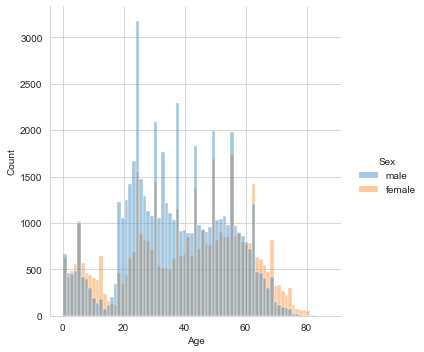

In [172]:
sns.displot(train_data, x="Age",hue="Sex",alpha=0.4)
plt.show()

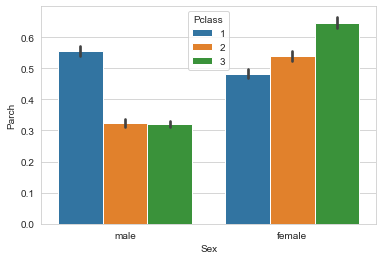

In [173]:
ax = sns.barplot(x="Sex", y="Parch", hue="Pclass", data=train_data)


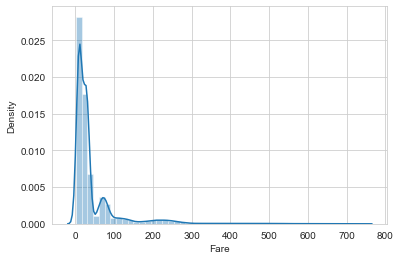

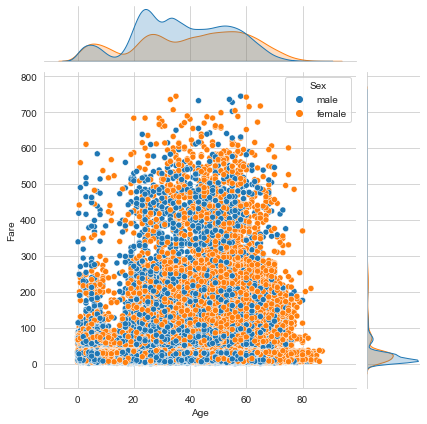

In [174]:
sns.distplot(train_data['Fare']) 
sns.jointplot(x='Age', y='Fare', hue="Sex", data=train_data) 
plt.show()


In [175]:
#sns.pairplot(train_data) 

In [176]:
#sns.stripplot(x='Sex', y='Age', data=train_data,jitter=True) 

# Data exploration

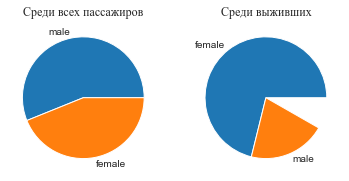

In [177]:
surv=train_data[(train_data["Survived"] == 1)]
plt.subplot(121)
plt.title('Среди всех пассажиров', fontsize=12, fontname='Times New Roman')
train_data.Sex.value_counts().plot(kind = 'pie',label= "",sort_columns="True")
plt.subplot(122)
plt.title('Среди выживших', fontsize=12, fontname='Times New Roman')
rel=surv.Sex.value_counts()/train_data.Sex.value_counts()
rel.plot(kind = 'pie',label= "",sort_columns="True")
plt.show()


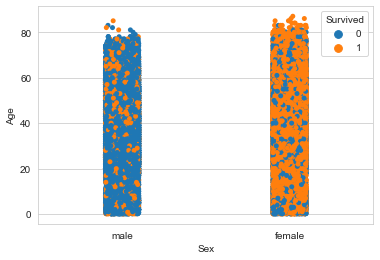

In [178]:
sns.stripplot(x='Sex', y='Age', data=train_data, jitter=True, hue='Survived') 
plt.show()

#### Влияние родственных связей на выживаемость

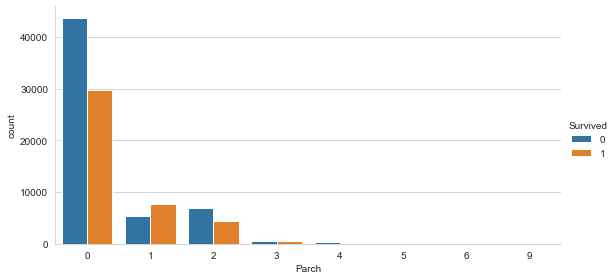

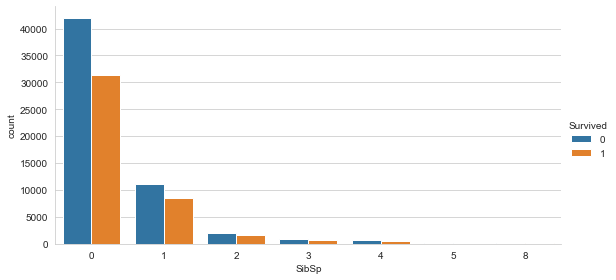

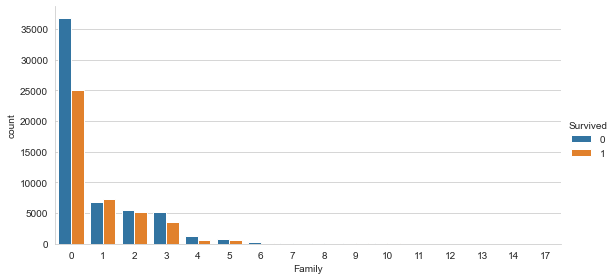

In [179]:

sns.catplot(x="Parch", hue="Survived", data=train_data, kind="count", height=4, aspect=2)
sns.catplot(x="SibSp", hue="Survived", data=train_data, kind="count", height=4, aspect=2)
train_data["Family"]=train_data["SibSp"]+train_data["Parch"]
sns.catplot(x="Family", hue="Survived", data=train_data, kind="count", height=4, aspect=2)

plt.show()

#### Влияние порта посадки на выживаемость

(S) - Southampton (C) - Cherbourg (Q) - Queenstown


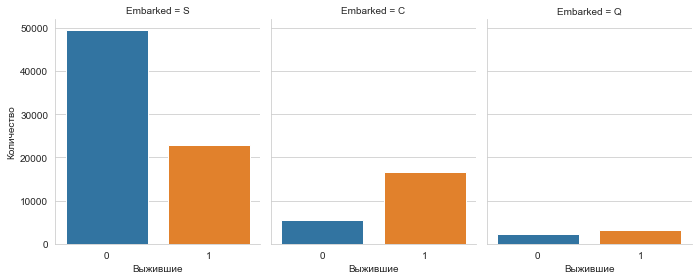

In [180]:
print("(S) - Southampton", "(C) - Cherbourg", "(Q) - Queenstown")
sns.catplot(x="Survived", col="Embarked", col_wrap=4,
                data=train_data, kind="count", height=4, aspect=.8).set(xlabel='Выжившие', ylabel='Количество')#
plt.show()

#### Состав семьи по порту

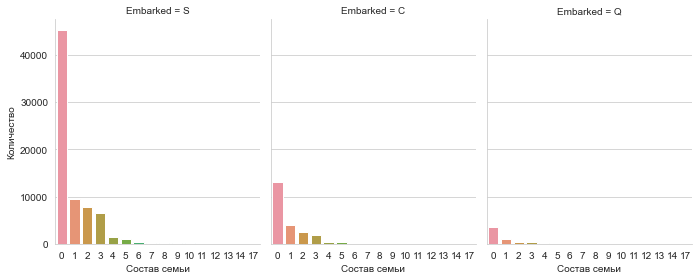

In [181]:
sns.catplot(x="Family", col="Embarked", col_wrap=4,
                data=train_data, kind="count", height=4, aspect=.8).set(xlabel='Состав семьи', ylabel='Количество')#
plt.show()

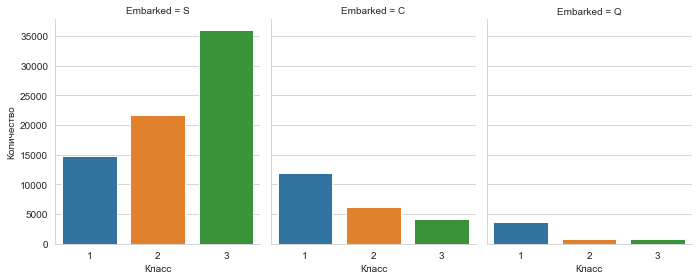

In [182]:
sns.catplot(x="Pclass", col="Embarked", col_wrap=4,
                data=train_data, kind="count", height=4, aspect=.8).set(xlabel='Класс', ylabel='Количество')#
plt.show()

In [183]:
#### Влияние класса каюты на выживаемость

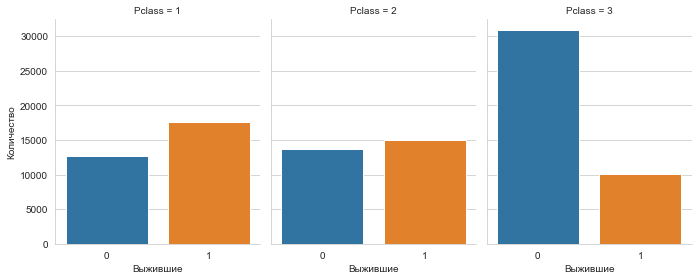

In [184]:
sns.catplot(x="Survived", col="Pclass", col_wrap=4,
                data=train_data, kind="count", height=4, aspect=.8).set(xlabel='Выжившие', ylabel='Количество')#
plt.show()

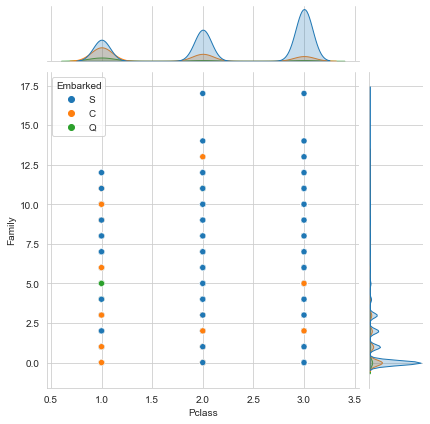

In [185]:
sns.jointplot(x='Pclass', y='Family', hue="Embarked", data=train_data) 
plt.show()

#### Влияние пола и возраста на выживаемость

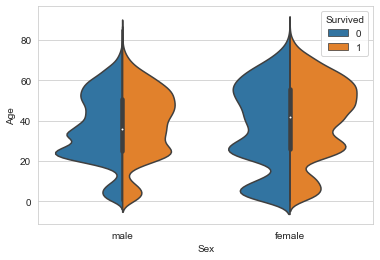

In [186]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived", data = train_data, split = True)
plt.show()

#### Сведение выше изложенных зависимостей в матрице корреляции

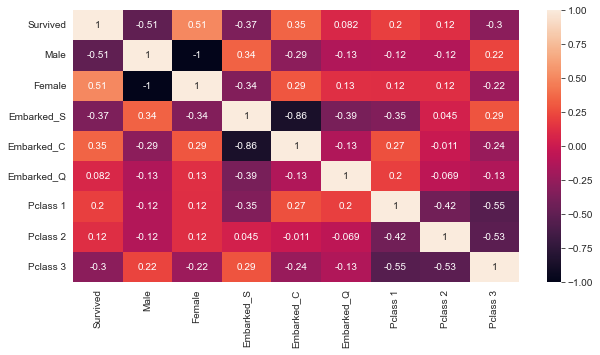

In [187]:
train_data['Sex']=train_data['Sex'].astype('category')
fig = plt.figure(figsize=(10,5))
train_data['Male'] = train_data['Sex'].replace(['female','male'],[0,1])
train_data['Female'] = train_data['Sex'].replace(['female','male'],[1,0])
train_data['Embarked_S'] = train_data['Embarked'].replace(['S','C','Q'],[1,0,0])
train_data['Embarked_C'] = train_data['Embarked'].replace(['S','C','Q'],[0,1,0])
train_data['Embarked_Q'] = train_data['Embarked'].replace(['S','C','Q'],[0,0,1])
train_data['Pclass 1'] = train_data['Pclass'].replace([1,2,3],[1,0,0])
train_data['Pclass 2'] = train_data['Pclass'].replace([1,2,3],[0,1,0])
train_data['Pclass 3'] = train_data['Pclass'].replace([1,2,3],[0,0,1])
heatmap_data=train_data[['Survived','Male','Female','Embarked_S','Embarked_C','Embarked_Q','Pclass 1','Pclass 2','Pclass 3']]
sns.heatmap(heatmap_data.corr(), annot=True)
plt.show()
del heatmap_data

#### Количество выживших от состава семьи

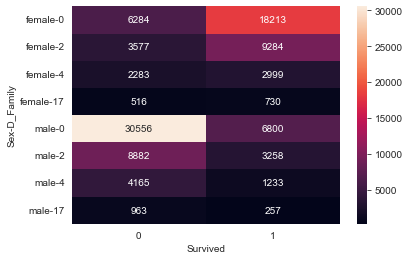

In [188]:
train_data["Family"]=train_data["SibSp"]+train_data["Parch"]
cut_bins = [-1,0,2, 4, train_data["Family"].max()]
train_data['D_Family']=pd.cut(train_data['Family'], bins=cut_bins,right='True',labels=[0, 2, 4,17])
#train_data['D_Family']=pd.cut(train_data['Family'], bins=17)

#print(train_data['D_Family'])
group = train_data.groupby(['Sex','D_Family','Survived'])
pclass_survived = group.size().unstack()
#print(pclass_survived)

sns.heatmap(pclass_survived, annot = True, fmt ="d")
plt.show()


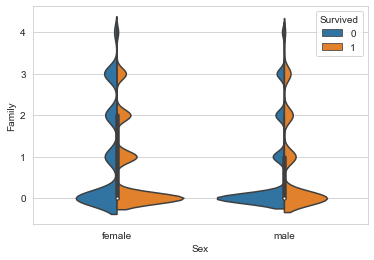

In [189]:
sns.violinplot(x ="Sex", y ="Family", hue ="Survived", data = train_data[(train_data["Family"] < 5)], split = True)
plt.show()

#### Выживаемость женщин от состава семьи

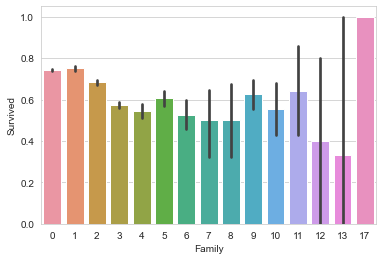

In [190]:
train_data["Family"]=train_data["SibSp"]+train_data["Parch"]
#f, axes = plt.subplots(1, 2)
#sns.barplot("Parch","Survived",data=train_data, ax=axes[0])
#sns.barplot("SibSp","Survived",data=train_data, ax=axes[1])
sns.barplot("Family","Survived",data=train_data[(train_data["Sex"]=="female")])
plt.show()


#### Выживаемость мужчин от состава семьи

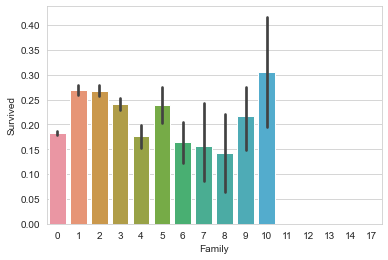

In [191]:
sns.barplot("Family","Survived",data=train_data[(train_data["Sex"]=="male")])
plt.show()

# Summary

### Большое влияние на выживаемость оказали: пол, порт посадки, класс, состав семьи
#### в Southampton на борт поднялось максимальное количество "одиночек" 3-го класса.

In [192]:
print('Процент спасшихся женщин, если они из порта Cherbourg, билет 1 класса, и путешевствовали в одиночку: {:3.2%}'.\
          format(train_data["Survived"][(train_data["Sex"]=="female") & (train_data["Embarked"]=="C") & \
                                       (train_data["Pclass"]==1) & (train_data["Family"]==0)].sum()/
                 train_data["Survived"][(train_data["Sex"]=="female") & (train_data["Embarked"]=="C") & \
                                       (train_data["Pclass"]==1) & (train_data["Family"]==0)].count()))
print('Выборка из: {} женщин'.\
          format(train_data["Survived"][(train_data["Sex"]=="female") & (train_data["Embarked"]=="C") & \
                                       (train_data["Pclass"]==1) & (train_data["Family"]==0)].count()))

Процент спасшихся женщин, если они из порта Cherbourg, билет 1 класса, и путешевствовали в одиночку: 90.07%
Выборка из: 5045 женщин


In [193]:
print('Процент спасшихся мужчин, если они из порта Southampton, билет 3 класса, и путешевствовали в одиночку: {:3.2%}'.\
          format(train_data["Survived"][(train_data["Sex"]=="male") & (train_data["Embarked"]=="S") & \
                                       (train_data["Pclass"]==3) & (train_data["Family"]==0)].sum()/
                 train_data["Survived"][(train_data["Sex"]=="male") & (train_data["Embarked"]=="S") & \
                                       (train_data["Pclass"]==3) & (train_data["Family"]==0)].count()))
print('Выборка из: {} мужчин'.\
          format(train_data["Survived"][(train_data["Sex"]=="male") & (train_data["Embarked"]=="S") & \
                                       (train_data["Pclass"]==3) & (train_data["Family"]==0)].count()))

Процент спасшихся мужчин, если они из порта Southampton, билет 3 класса, и путешевствовали в одиночку: 8.33%
Выборка из: 19975 мужчин
